# Data Exploration

This Jupyter notebook provides a step-by-step guide to explore the data for project. The purpose of this notebook is to analyze and gain insights into the available data. This notebook explores various data exploration techniques, visualization libraries, and statistical analysis methods to understand the data distribution, relationships, trends, anomalies and etc.

By going through this notebook, we will be able to:

- Load and examine the raw data files
- Perform descriptive statistics and summary analysis
- Visualize the data using charts, plots, and graphs
- Discover patterns and anomalies within the data
- Generate insights and make informed decisions for project

### Install Dependencies

To install the dependencies for this project, we will be using [PDM](https://pdm.fming.dev/latest/), which is a modern Python package and dependency manager supporting the latest PEP standards. To install the dependencies using PDM, follow these steps:
- Install PDM on the system. We can install it by following the instructions provided in the [PDM documentation](https://pdm.fming.dev/latest/#installation).
- Once PDM is installed, navigate to the project directory in terminal and run the following command to install the dependencies specified in the `pyproject.toml` file:
    ```bash
    pdm install
    ```

### Import Packages

In [134]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

This section involves retrieving the data from a sqlite database and loading it into two Pandas DataFrames. This step is essential for further analysis and exploration of the data.

In [135]:
conn = sqlite3.connect(os.path.join(os.getcwd(), "project", "fau_data_engineering_ss23.sqlite"))
bicycle_traffic_df = pd.read_sql_query(f"SELECT * FROM mobilithek_bicycle_traffic", conn)
weather_data_df = pd.read_sql_query(f"SELECT * FROM meteostat_weather_data", conn)
conn.close()

In [136]:
bicycle_traffic_df.head()

,Date,Deutzer Brücke,Hohenzollernbrücke,Neumarkt,Zülpicher Straße,Bonner Straße,Venloer Straße,A.-Schütte-Allee,Vorgebirgspark,A.-Silbermann-Weg,Stadtwald,Niederländer Ufer,Vorgebirgswall,Universitäts-straße,Rodenkirchener Brücke,Severinsbrücke,Neusser Straße,Hohe Pforte
0,January-2009,46319,24610,59344,78727,0,0,0,0,0,0,0,0,0,0,0,0,0
1,February-2009,47764,29590,62228,91075,0,0,0,0,0,0,0,0,0,0,0,0,0
2,March-2009,68778,44312,84760,107262,0,0,0,0,0,0,0,0,0,0,0,0,0
3,April-2009,78619,55086,95298,146057,0,0,0,0,0,0,0,0,0,0,0,0,0
4,May-2009,79369,52725,102051,159319,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
weather_data_df.head()

,date,tavg_10513,tmin_10513,tmax_10513,prcp_10513,wspd_10513,pres_10513,tsun_10513,tavg_D2968,tmin_D2968,tmax_D2968,prcp_D2968,wspd_D2968,pres_D2968,tsun_D2968
0,January-2009,-0.5,-4.4,2.9,26.0,11.1,1015.2,5340.0,0.4,-2.6,3.4,36.9,0.0,0.0,0.0
1,February-2009,3.1,0.0,6.2,70.0,12.3,1014.5,1800.0,3.8,1.2,6.4,71.0,0.0,0.0,0.0
2,March-2009,6.1,1.7,10.5,104.0,12.6,1014.9,5460.0,6.9,3.3,10.6,100.0,0.0,0.0,0.0
3,April-2009,13.3,6.8,19.1,78.0,10.0,1014.0,11220.0,14.0,8.8,19.0,59.2,0.0,0.0,0.0
4,May-2009,14.5,8.0,20.1,63.0,10.8,1019.2,11940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Exploration

This section focuses on exploring two sets of data further: [Mobilithek Bicycle Traffic Data in Köln](https://mobilithek.info/offers/-2236641647976866002) and [Meteostat Weather and Climate Data of Köln](https://dev.meteostat.net/bulk/monthly.html).

#### Exploration of the Mobilithek Bicycle Traffic Data in Köln

In [138]:
bicycle_traffic_df.shape

(168, 18)

In [139]:
bicycle_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   168 non-null    object
 1   Deutzer Brücke         168 non-null    int64 
 2   Hohenzollernbrücke     168 non-null    int64 
 3   Neumarkt               168 non-null    int64 
 4   Zülpicher Straße       168 non-null    int64 
 5   Bonner Straße          168 non-null    int64 
 6   Venloer Straße         168 non-null    int64 
 7   A.-Schütte-Allee       168 non-null    int64 
 8   Vorgebirgspark         168 non-null    int64 
 9   A.-Silbermann-Weg      168 non-null    int64 
 10  Stadtwald              168 non-null    int64 
 11  Niederländer Ufer      168 non-null    int64 
 12  Vorgebirgswall         168 non-null    int64 
 13  Universitäts-straße    168 non-null    int64 
 14  Rodenkirchener Brücke  168 non-null    int64 
 15  Severinsbrücke         

Now, let's examine the date range of the 'Bicycle Traffic Data in Köln' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [140]:
date_df = pd.to_datetime(bicycle_traffic_df['Date'], format='%B-%Y')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Bicycle Traffic Data in Köln: {min_date} to {max_date}"

'Date Range of the Bicycle Traffic Data in Köln: January-2009 to December-2022'

In [141]:
bicycle_traffic_df.head(6)

,Date,Deutzer Brücke,Hohenzollernbrücke,Neumarkt,Zülpicher Straße,Bonner Straße,Venloer Straße,A.-Schütte-Allee,Vorgebirgspark,A.-Silbermann-Weg,Stadtwald,Niederländer Ufer,Vorgebirgswall,Universitäts-straße,Rodenkirchener Brücke,Severinsbrücke,Neusser Straße,Hohe Pforte
0,January-2009,46319,24610,59344,78727,0,0,0,0,0,0,0,0,0,0,0,0,0
1,February-2009,47764,29590,62228,91075,0,0,0,0,0,0,0,0,0,0,0,0,0
2,March-2009,68778,44312,84760,107262,0,0,0,0,0,0,0,0,0,0,0,0,0
3,April-2009,78619,55086,95298,146057,0,0,0,0,0,0,0,0,0,0,0,0,0
4,May-2009,79369,52725,102051,159319,0,0,0,0,0,0,0,0,0,0,0,0,0
5,June-2009,85576,51538,131255,160123,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
bicycle_traffic_df.tail(6)

,Date,Deutzer Brücke,Hohenzollernbrücke,Neumarkt,Zülpicher Straße,Bonner Straße,Venloer Straße,A.-Schütte-Allee,Vorgebirgspark,A.-Silbermann-Weg,Stadtwald,Niederländer Ufer,Vorgebirgswall,Universitäts-straße,Rodenkirchener Brücke,Severinsbrücke,Neusser Straße,Hohe Pforte
162,July-2022,160142,78793,144518,155971,83698,181380,82110,35634,94880,82634,92596,89681,90651,69970,50351,104689,95068
163,August-2022,199040,104883,161798,174193,99881,207493,98258,45461,113437,116920,113372,124947,99332,84308,65845,128545,112127
164,September-2022,159829,79025,137943,163504,85979,178292,69677,34505,84756,78143,77222,100410,100228,55764,54330,105910,95742
165,October-2022,152882,75197,136711,172506,85703,189374,68128,31347,90212,75335,73277,96018,176722,51947,52062,104598,94887
166,November-2022,135685,69464,122413,162549,77491,169261,48256,28750,75998,65878,57586,93465,176539,41001,47036,99518,93621
167,December-2022,84232,43723,90147,105479,59919,121938,26591,18024,47965,32779,31445,62247,111549,20481,27754,70152,75571


By examining the head and tail of the Mobilithek Bicycle Traffic Data in Köln, we can observe that initially not all counting stations recorded bicycle traffic counts. Hence, we can verify the number of counting stations based on the date.

In [143]:
counting_stations_df = pd.DataFrame({'Date': bicycle_traffic_df['Date']})
counting_stations_df['Counting Stations'] = (bicycle_traffic_df.iloc[:, 1:] != 0).sum(axis=1)
counting_stations_df

,Date,Counting Stations
0,January-2009,4
1,February-2009,4
2,March-2009,4
3,April-2009,4
4,May-2009,4
...,...,...
163,August-2022,17
164,September-2022,17
165,October-2022,17
166,November-2022,17


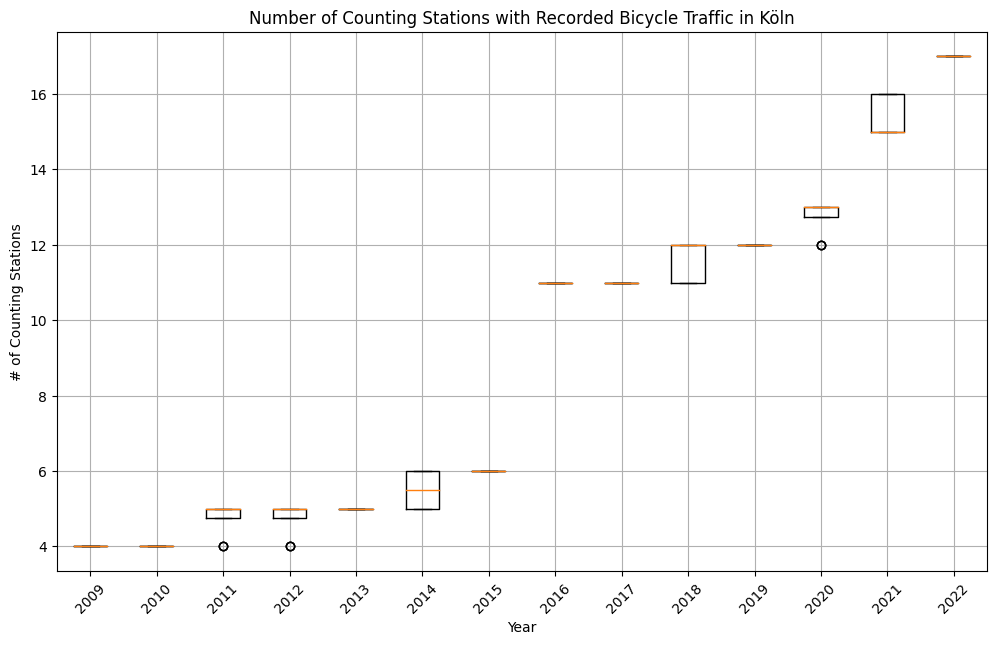

In [145]:
# Extract the year from the date column
counting_stations_df['Year'] = counting_stations_df['Date'].str.split('-').str[1]

# Group the data by year
grouped_data = counting_stations_df.groupby('Year')['Counting Stations'].apply(list)

# Set the figure size
plt.figure(figsize=(12, 7))

# Create the box plot
plt.boxplot(grouped_data.values)

# Customize the plot
plt.title('Number of Counting Stations with Recorded Bicycle Traffic in Köln')
plt.xlabel('Year')
plt.ylabel('# of Counting Stations')
plt.grid(True)

# Set the x-axis labels to show only the year
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index, rotation=45)

# Show the plot
plt.show()

#### Exploration of the Meteostat Weather and Climate Data of Köln

Station Details of Köln:
- Station ID: 10513, Station Name: Köln-Bonn Airport, Station Region: NW
- Station ID: D2968, Station Name: Köln-Stammheim, Station Region: NW

In [146]:
weather_data_df.shape

(168, 15)

In [147]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        168 non-null    object 
 1   tavg_10513  168 non-null    float64
 2   tmin_10513  168 non-null    float64
 3   tmax_10513  168 non-null    float64
 4   prcp_10513  168 non-null    float64
 5   wspd_10513  168 non-null    float64
 6   pres_10513  168 non-null    float64
 7   tsun_10513  168 non-null    float64
 8   tavg_D2968  168 non-null    float64
 9   tmin_D2968  168 non-null    float64
 10  tmax_D2968  168 non-null    float64
 11  prcp_D2968  168 non-null    float64
 12  wspd_D2968  168 non-null    float64
 13  pres_D2968  168 non-null    float64
 14  tsun_D2968  168 non-null    float64
dtypes: float64(14), object(1)
memory usage: 19.8+ KB


Now, let's examine the date range of the 'Weather and Climate Data of Köln' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [148]:
date_df = pd.to_datetime(weather_data_df['date'], format='%B-%Y')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Weather and Climate Data of Köln: {min_date} to {max_date}"

'Date Range of the Weather and Climate Data of Köln: January-2009 to December-2022'